<a href="https://colab.research.google.com/github/mctuliomontoya/TC1002S/blob/a01254155-branch/Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Evaluable: Mapas de calor y boxplots
## Integrantes:
- Marco Tulio Montoya
- Ángel Fidel de Jesus Marín
- André Castillo

## Análisis de datos

Se navega hasta la ruta donde se encuentran los archivos a trabajar.

In [85]:
%cd content/drive/MyDrive/TC1002S/'Google colab'/datasets

/content/drive/MyDrive/TC1002S/Google colab/datasets


Se importan los módulos de `numpy`, `pandas`, `matlotlib` y `seaborn`.


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se crea un `dataframe`, este agarrará los datos del archivo *credit.csv*.

In [87]:
df = pd.read_csv('credit.csv')
df.head(3)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


Al observar que contiene una columna con los índices de cada dato, nos damos cuenta que es inútil, por lo que se borra la primera columna para una mejor lectura y manipulación de datos.

In [35]:
df = df.drop("Unnamed: 0", axis=1)

In [36]:
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


Se utiliza el método descriibe para ver datos sobre las variables del archivo.

In [37]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Usamos el método info para ver el tipo de las variables.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


 Vamos a graficar el conteo de la variable categórica (Ethnicity).

Text(0, 0.5, 'Frecuency')

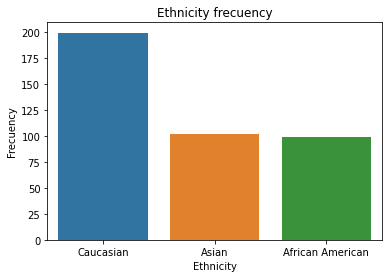

In [88]:
fig = plt.figure(figsize=(6,4))

sns.countplot(data=df, x = 'Ethnicity')

plt.title('Ethnicity frecuency')
plt.xlabel('Ethnicity')
plt.ylabel('Frecuency')

Text(0, 0.5, 'Ethnicity')

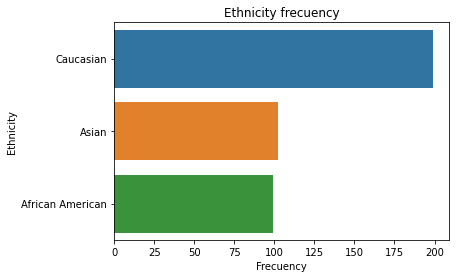

In [89]:
fig = plt.figure(figsize=(6, 4))

sns.countplot(data=df, y = 'Ethnicity')

plt.title('Ethnicity frecuency')
plt.xlabel('Frecuency')
plt.ylabel('Ethnicity')

Ahora se hace un histograma con la variable Income.

<Axes: xlabel='Income', ylabel='Count'>

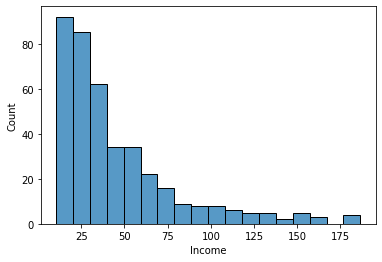

In [41]:
sns.histplot(data=df, x='Income')

Se hace un nuevo histograma, ahora con la variable Limit.

<Axes: xlabel='Limit', ylabel='Count'>

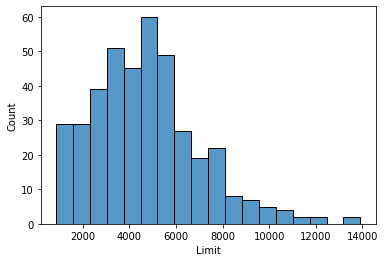

In [63]:
sns.histplot(data=df, x="Limit")

Se crea una comparación de la distibución entre tarjetas y el límite de crédito otorgado.

Text(0.5, 1.0, 'Comparación de la distribución tarjetas vs limite de crédito')

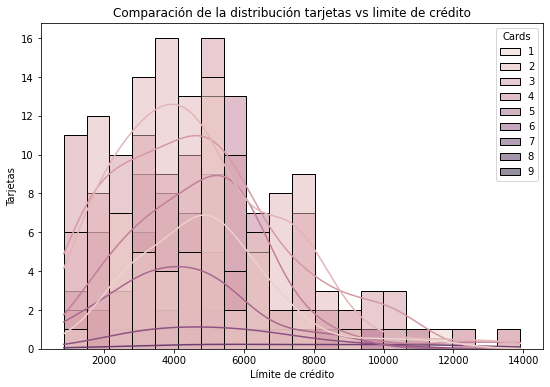

In [90]:
fig = plt.figure(figsize=(9,6))

sns.histplot(data=df, x='Limit', hue='Cards', bins=20, kde=True)

plt.xlabel('Límite de crédito')
plt.ylabel('Tarjetas')
plt.title('Comparación de la distribución tarjetas vs limite de crédito')

Se crea una lista de tablas, entre la comparación y relación entre el límite de crédito con las demás variables.

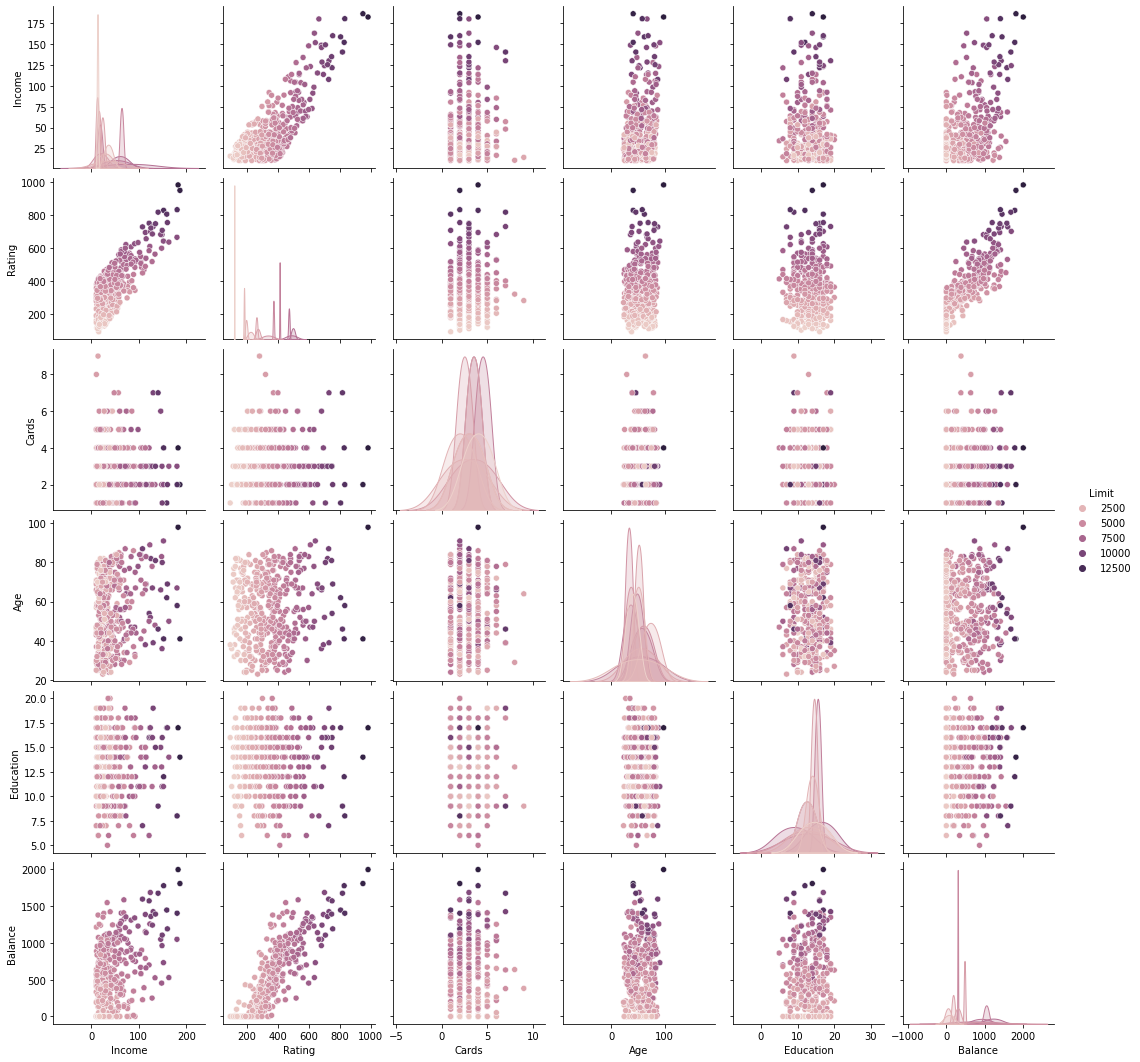

In [64]:
sns.pairplot(data=df, hue='Limit')

Se establece la correlación entre las variables del dataframe de crédito.

In [44]:
cred_corr = df.corr()

Se crea un mapa de calor (heatmap) mostrando las correlaciones entre variables.

<Axes: >

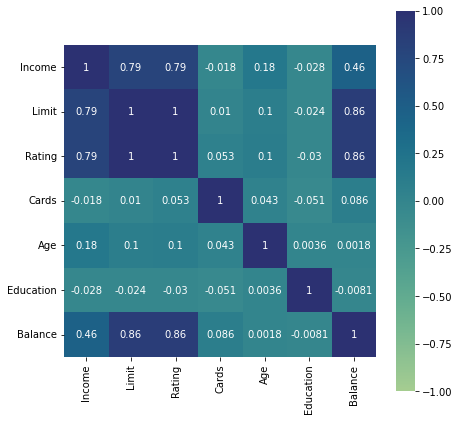

In [59]:

fig = plt.figure(figsize=(7,7))
sns.heatmap(data=cred_corr, vmin=-1, vmax=1, cmap = 'crest', annot=True,square=True)

Se crea un gráfico boxplot del límite de crédito y la etnia del solicitante.

Text(0.5, 1.0, 'Histograma de la etnia y límite de credito')

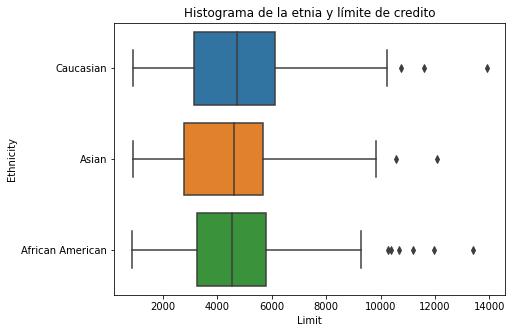

In [91]:
fig = plt.figure(figsize=(7,5))

sns.boxplot(data=df, x='Limit', y = 'Ethnicity')

plt.title('Histograma de la etnia y límite de credito')

## Preguntas

**¿Hay alguna variable que no aporta información?**

Al realizar el mapa de calor del conunto de datos, podemos observar que las variables que tienen menor influencia con el límite de crédito otorgado son, edad, número de tarjetas y educación.


**Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?**
Las variables con menor correlación conforme al límite de crédito, en este caso edad, número de tarjetas y educación, si se eliminan las varables se podrá realizar un modelo mas preciso.

**¿Existen variables que tengan datos extraños?**
En este caso, podemos observar que el balance tiene datos que destacan por ser muy elevados, a comparación del resto de datos.

**¿Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?** La mayoría de variables tienen rangos escalables, pero hay muchas que tienen rangos muy distintos, por ejemplo la variable de edad, que tiene un rango de 75, a comparación de la variable de balance, que su rango es de 1999

**¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?**
Si, dentro de las gráficas podemos encontrar varios grupos muy parecidos, por ejemplo age-income / age-rating